# LEAD SCORING CASE STUDY

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to **build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance**. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study

Build a **logistic regression model** to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Reading and Inspecting Data

In [2]:
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Shape of the dataset
lead.shape

(9240, 37)

In [4]:
# Datatypes of the dataset
lead.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [5]:
# Checking info of the leads dataset
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Exploring numerical parameters of the data
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning

In [7]:
# Converting 'Select' values to NaN.

lead = lead.replace('Select', np.nan)

In [8]:
# Checking percentage of null values in each column

round(100*(lead.isnull().sum()/len(lead)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Dropping columns with more than 45% null values

for col in lead.columns:
    if (round(lead[col].isnull().sum()/len(lead)*100,2)>=45):
        lead.drop(col,1,inplace = True)

In [10]:
# Dropping 'Tags' column as it is assigned by the company itself 

lead = lead.drop("Tags",1)

In [11]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [12]:
lead.shape

(9240, 29)

In [13]:
# Dropping columns that have only one unique value,as they won't be responsible in predicting a successful lead case

for col in lead.columns:
    if len(lead[col].unique()) == 1:
        lead.drop(col,1,inplace = True)

In [14]:
lead.shape

(9240, 24)

#### 5 columns were deleted since they had only one unique value
- Magazine
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- I agree to pay the amount through cheque
- Get updates on DM Content

In [15]:
# Checking percentage of null values in each column after deleting rows

round(100*(lead.isnull().sum()/len(lead)),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Total Time Spent on Website                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Newspaper 

In [16]:
# Checking the value counts of top columns having missing values

print(lead['City'].value_counts())
print()
print(lead['Specialization'].value_counts())
print()
print(lead['What matters most to you in choosing a course'].value_counts())
print()
print(lead['What is your current occupation'].value_counts())
print()
print(lead['Country'].value_counts())
print()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization

- <b> What matters most to you in choosing a course </b> is a highly skewed column toward 'Better Career Prospects' and contains 29.32% missing values. Also, imputing the missing values with the mode value of Better Career Prospects will make it highly skewed. So we can drop that column instead.

- <b> Country </b> column could not help in the lead score context because the X Education is an online learning platform. Lead's country won't matter as this course can be done at any part of the world provided with internet connection. Hence, we will be dropping this column.

- Same goes for <b> City </b> column. Hence, we'll be dropping this column.

- <b> What is your current occupation </b> is an important variable for finding the leads as course is designed for industry professionals. We will impute the missing values as 'Unknown'.

- <b> Specialization </b> is an important variable for finding the leads score as it represents the  industry domain in which the candidate has worked before. Since it has 36.58% of null values, we will impute the missing values as 'Unknown'.

In [17]:
#Dropping 'Country' column from the dataset

lead = lead.drop('Country',axis=1)

#Dropping 'What matters most to you in choosing a course' column from the dataset

lead= lead.drop('What matters most to you in choosing a course', axis=1)

#Dropping 'City' column from the dataset

lead = lead.drop('City',axis=1)

In [18]:
# Creating a new category 'Unknown' for null values in 'Specialization' column

lead['Specialization'].fillna("Unknown", inplace = True)

# Creating a new category 'Unknown' for null values in 'What is your current occupation' column

lead['What is your current occupation'].fillna("Unknown",inplace=True)

In [19]:
# Checking percentage of null values in each column again
round(100*(lead.isnull().sum()/len(lead)),2).sort_values(ascending=False)

Page Views Per Visit                      1.48
TotalVisits                               1.48
Last Activity                             1.11
Lead Source                               0.39
Lead Number                               0.00
Lead Origin                               0.00
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Last Notable Activity                     0.00
A free copy of Mastering The Interview    0.00
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Prospect ID                               0.00
dtype: float6

In [20]:
# Since missing value percentage is very less for columns 'Page Views Per Visit', 'TotalVisits', 'Last Activity', and 'Lead Source', we'll be dropping the rows with missing values

lead.dropna(inplace=True)

In [21]:
# Ensuring if all remaining columns have 0% null values

round(100*(lead.isnull().sum()/len(lead)),2).sort_values(ascending=False)

Last Notable Activity                     0.0
Page Views Per Visit                      0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Last Activity                             0.0
A free copy of Mastering The Interview    0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Prospect ID                               0.0
dtype: float64

In [22]:
# Shape of the dataframe

lead.shape

(9074, 21)

In [23]:
# Checking unique values in columns again

lead.nunique()

Prospect ID                               9074
Lead Number                               9074
Lead Origin                                  4
Lead Source                                 21
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                       114
Last Activity                               17
Specialization                              19
What is your current occupation              7
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

- <b> Prospect ID </b> and <b> Lead Number </b> have all unique values, hence they will not be useful for our analysis. Hence, we'll be dropping them.

In [24]:
# Dropping 'Prospect ID' column

lead = lead.drop(['Prospect ID', 'Lead Number'],axis=1)

In [25]:
lead.shape

(9074, 19)

### After cleaning the data, we are left with 9074 rows and 20 columns.

# Outlier Treatment

In [26]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%

lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


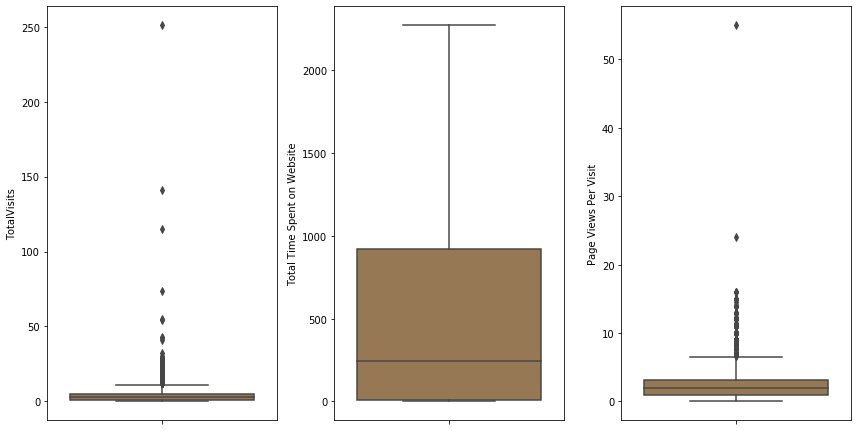

In [27]:
# Plotting boxplots for numerical variables

numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

def boxplot(var_list):
    plt.figure(figsize=(20,12))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        sns.boxplot(y=var,palette='cubehelix', data=lead)
        
    plt.tight_layout()
    
    plt.show()
    
boxplot(numeric_variables)    

#### Outliers are present in 'TotalVisits' and 'Page Views Per Visit'

In [28]:
# Removing outliers for 'TotalVisits'

Q3 = lead['TotalVisits'].quantile(0.95)
Q1 = lead['TotalVisits'].quantile(0.05)
IQR = Q3 - Q1
lead = lead[(lead['TotalVisits'] >= Q1 - 1.5 * IQR) & (lead['TotalVisits'] <= Q3 + 1.5 * IQR) ]

# Removing outliers for 'Page Views Per Visit'
Q3 = lead['Page Views Per Visit'].quantile(0.95)
Q1 = lead['Page Views Per Visit'].quantile(0.05)
IQR = Q3 - Q1
lead = lead[(lead['Page Views Per Visit'] >= Q1 - 1.5 * IQR) & (lead['Page Views Per Visit'] <= Q3 + 1.5 * IQR) ]

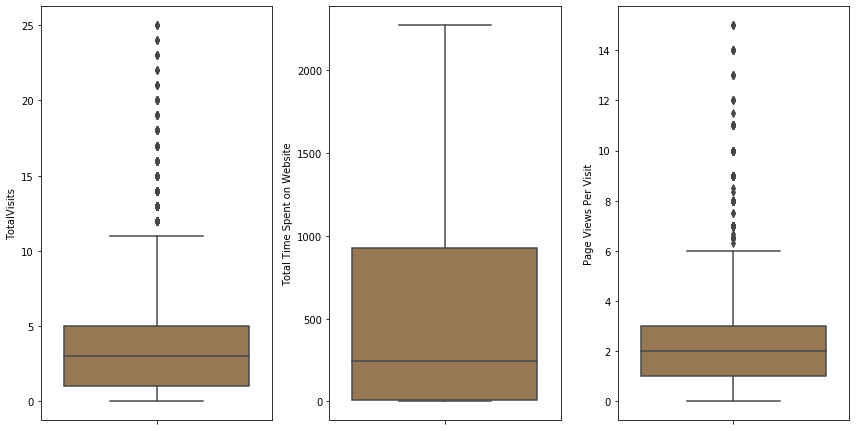

In [29]:
# Checking distribution of numerical variables again after removing outliers

numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

def boxplot(var_list):
    plt.figure(figsize=(20,12))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        sns.boxplot(y=var,palette='cubehelix', data=lead)
        
    plt.tight_layout()
    
    plt.show()
    
boxplot(numeric_variables)

# Univariate Analysis

In [30]:
# Getting all categorical columns
cat_columns = lead.dtypes[lead.dtypes =='object'].index
print(len(cat_columns))
print()
print(cat_columns)

15

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


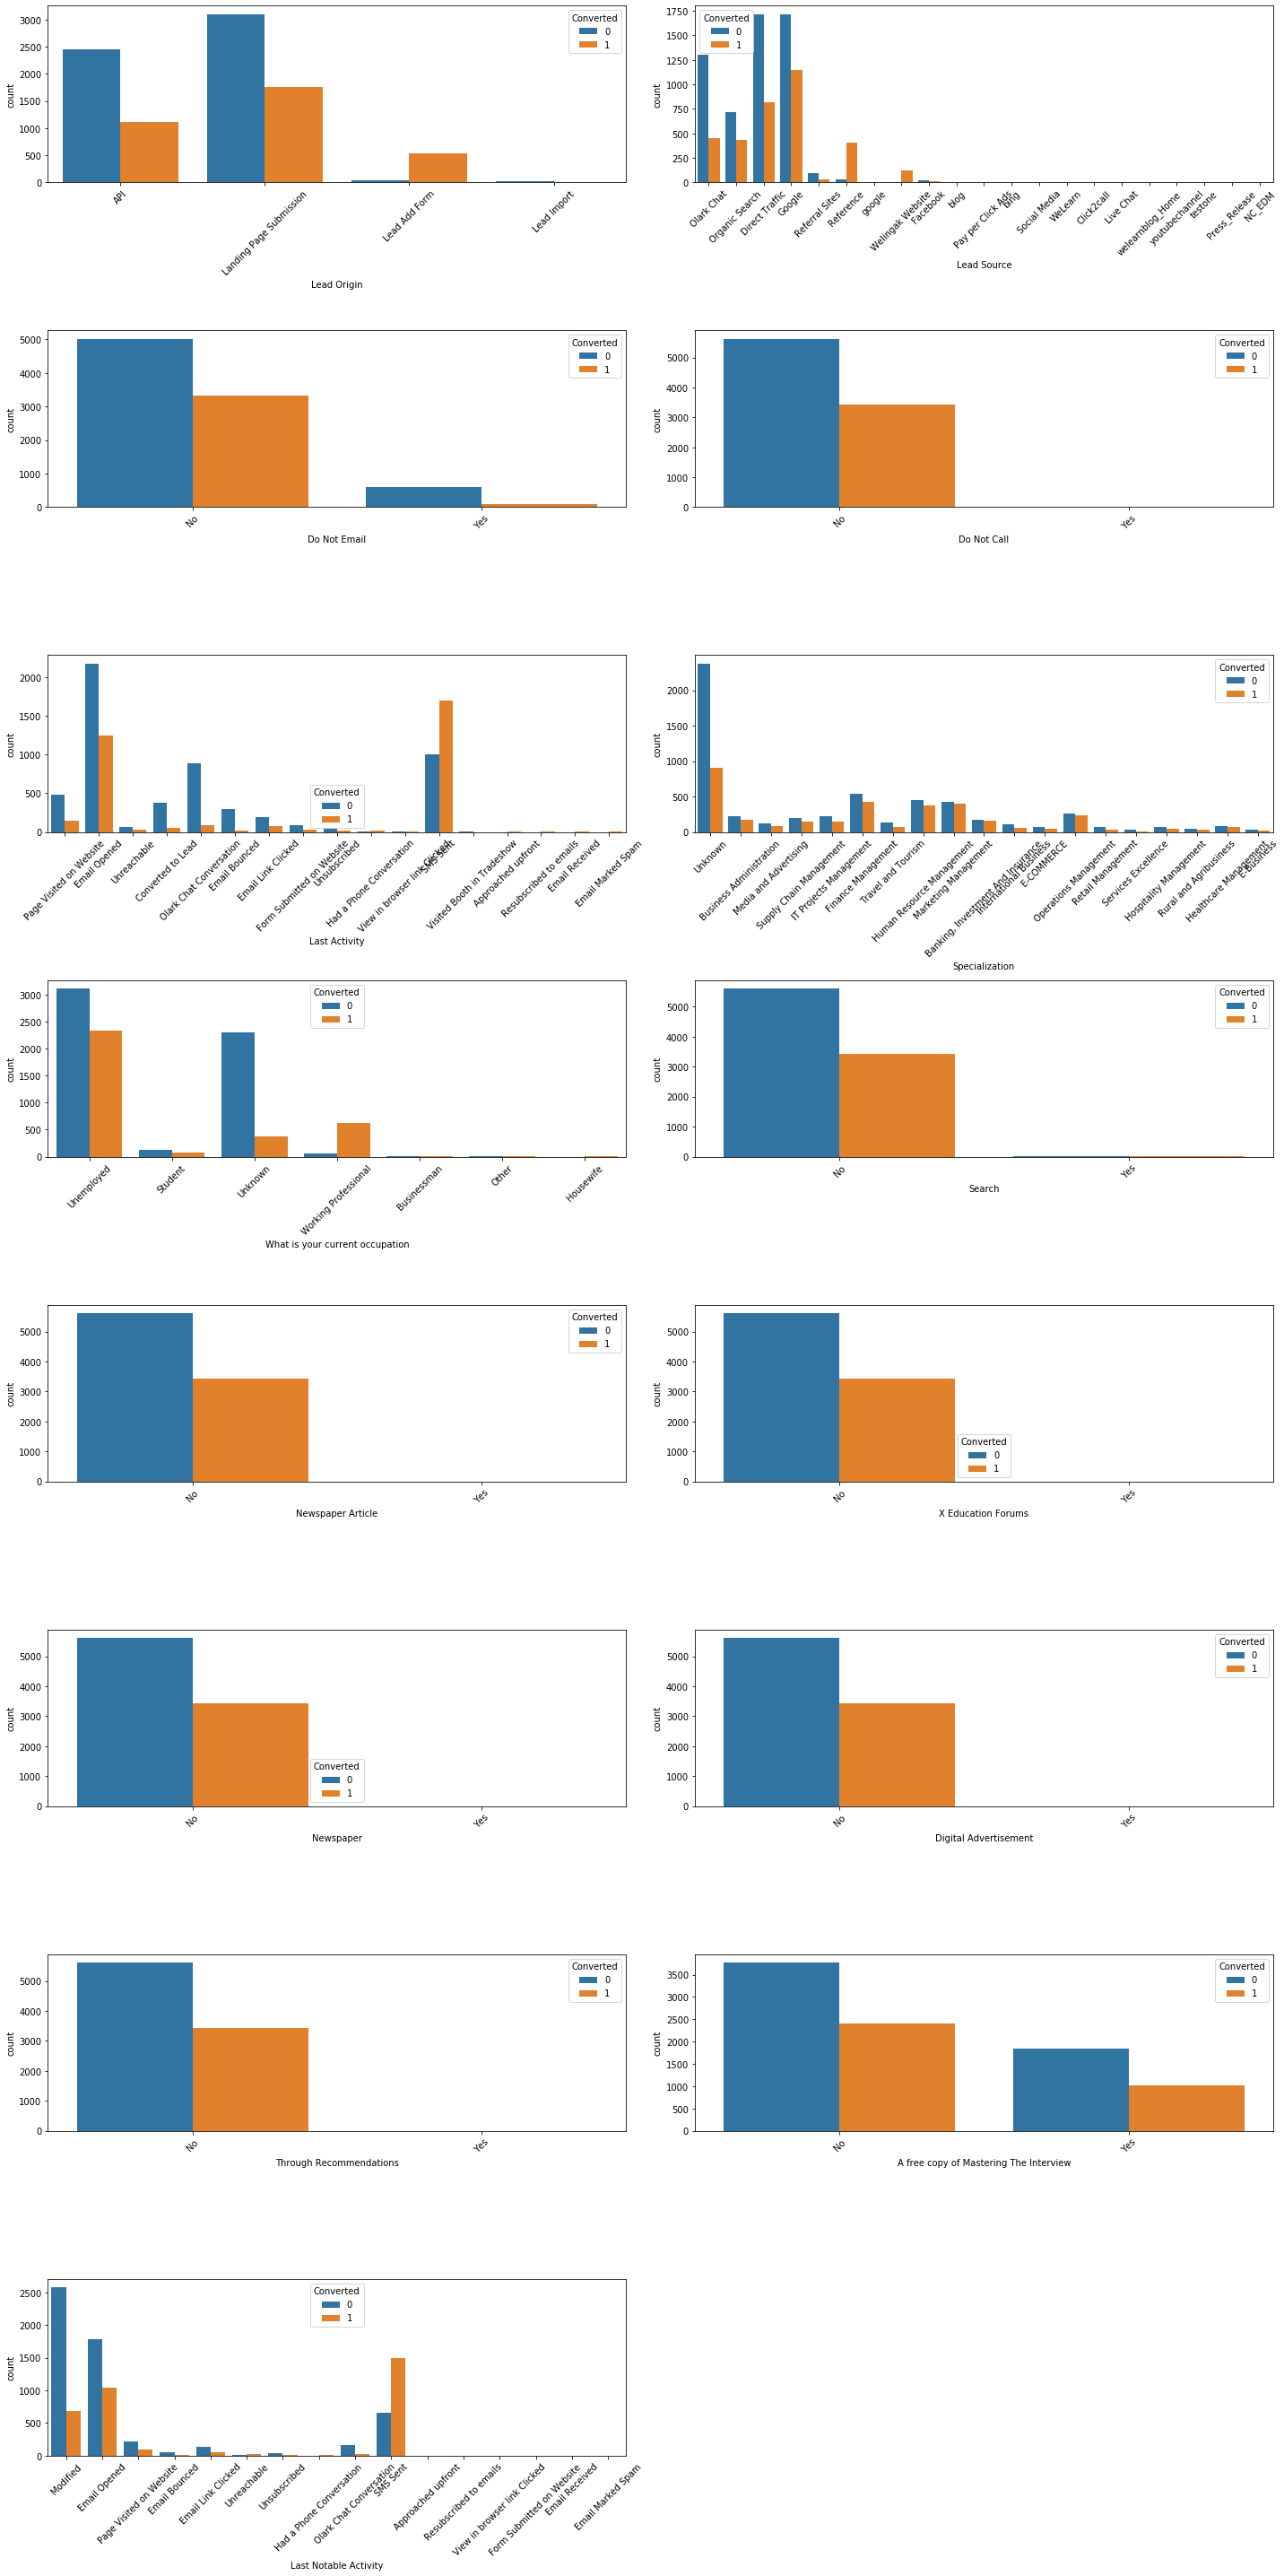

In [31]:
# Plotting countplot for categorical columns 

plt.figure(figsize=(20,40))
for i,col in enumerate(cat_columns):
    plt.subplot(8,2,i+1)
    sns.countplot(x=col,data = lead, hue='Converted')
    plt.xticks(rotation=45)
    plt.tight_layout()

- __`Lead Origin`__ column has Lead Add Form value which has more potential of lead getting converted 
- In __`Lead Source`__ column, Reference has proven to be the most influential to be getting converted. Out of 534, 490 are converted successfully.
- There is nothing significant information in columns such as __`Do Not Email, Do Not Call, Search and Newspaper Article`__ because all the information is skewed towards only one value ('NO')
- Most leads are getting converted after the `SMS is sent` as shown in Last Activity
- `Working Professional` can be the target occupation that has very high potential of getting converted
- There is nothing significant information in columns such as __`X Education Forums, Newspaper, Digital Advertisement and Through Reccomendations`__ because all the information is skewed towards only one value ('NO')
- Also, `SMS Sent` has shown more potential in lead conversion

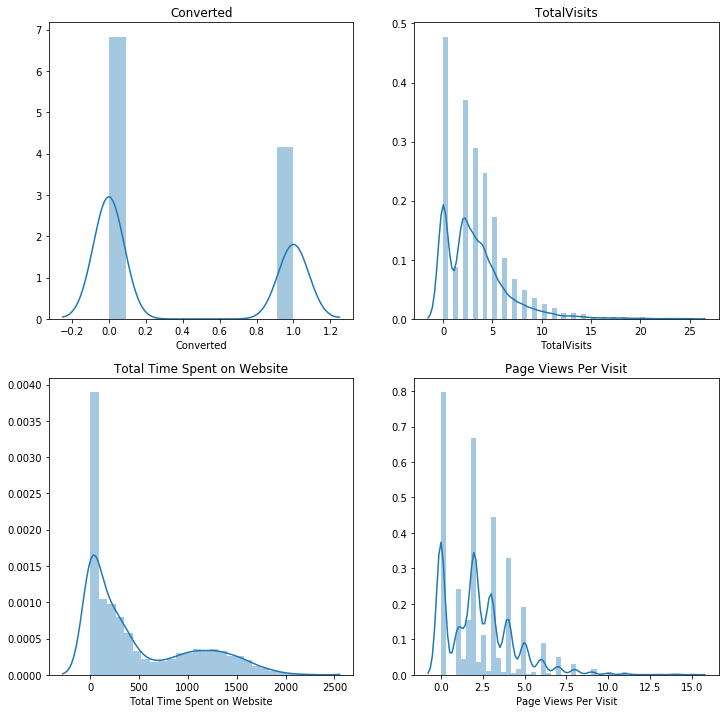

In [32]:
num_columns = ['Converted','TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

# Plotting distribution plot of all numerical columns

plt.figure(figsize=(12,12))
for i,col in enumerate(num_columns):
    plt.subplot(2,2,i+1)
    sns.distplot(lead[col]).set(title=col)

- Leads have mostly visited the platform once or twice
- Leads have highly spent 50-100 seconds on the platform
- Most of the leads have visited only first page followed by two pages

# Bivariate Analysis

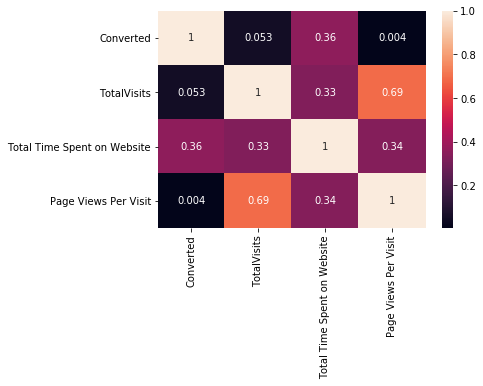

In [33]:
# Checking the correlation values

sns.heatmap(lead.corr(), annot = True)

Correlation map shows less correlations between variables except there is high correlation between `TotalVisits` and `Page Views Per Visit` which will be treated during VIF feature elimination

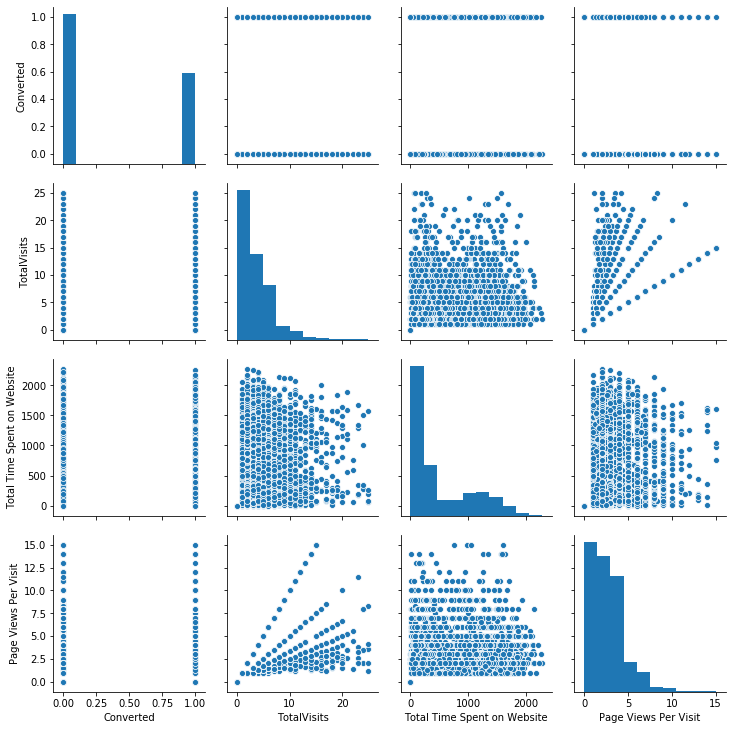

In [34]:
sns.pairplot(lead)

There is no apparent pattern between any variables.

# Preparing the Data for Modeling

#### Converting Yes/No variables to 1/0:

In [35]:
varlist =  ['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead[varlist] = lead[varlist].apply(binary_map)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,0,0,0,0,0,0,0,Modified


In [36]:
lead1 = pd.get_dummies(lead, drop_first = True)
lead1.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [37]:
lead1.shape

(9048, 91)

### Train - Test Split

In [38]:
# Separating the target column
y = lead1.pop('Converted')
X = lead1

In [39]:
# Splitting the dataset in 70-30 ratio into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
X_train.shape

(6333, 90)

In [41]:
X_test.shape

(2715, 90)

### Feature Scaling

In [42]:
num_columns = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

# Scaling the numerical data using Min-Max Scaler

scaler = MinMaxScaler()

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8425,0,0,0.00,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8341,0,0,0.00,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7376,0,0,0.08,0.194407,0.133333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7414,0,0,0.00,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3521,0,0,0.20,0.504217,0.333333,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
# Checking the present lead conversion rate

convert = (sum(lead['Converted'])/len(lead['Converted'].index))*100
convert

37.8868258178603

Present Lead Conversion Rate is <b>37.88% </b>

# Model Building

#### We will be building the model using statsmodels and Recursive Feature Elimination (RFE)

In [44]:
# Model 1
X_train_sm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
X_train_sm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6248
Model Family:                Binomial   Df Model:                           84
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Sep 2020   Deviance:                          nan
Time:                        23:44:45   Pearson chi2:                 6.71e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -1.051e+15   8.04e+07  -1.31e+07      0.000   -1.05e+15   -1.05e+15
Do Not Email                                          -1.58e+14   4.53e+06  -3.49e+07      0.000   -1.58e+14   -1.58e+14
Do Not Call                                           3.177e+15   4.77e+07   6.66e+07      0.000    3.18e+15    3.18e+15
TotalVisits                                            1.45e+15   9.94e+06   1.46e+08      0.000    1.45e+15    1.45e+15
Total Time Spent on Website                           3.134e+15   4.09e+06   7.66e+08      0.000    3.13e+15    3.13e+15
Page Views Per Visit                                 -1.271e+15   1.03e+07  -1.24e+08      0.000   -1.27e+15   -1.27e+15
Search                                               -1.372e+15   2.17e+07  -6.33e+07      0.000   -1.37e+15   -1.37e+15
Newspaper Article                                     3.499e+15   6.74e+07   5.19e+07      0.000     3.5e+15     3.5e+15
X Education Forums                                   -5.881e+15   5.14e+07  -1.14e+08      0.000   -5.88e+15   -5.88e+15
Newspaper                                            -6.381e+15   6.73e+07  -9.48e+07      0.000   -6.38e+15   -6.38e+15
Digital Advertisement                                -5.881e+15   5.14e+07  -1.14e+08      0.000   -5.88e+15   -5.88e+15
Through Recommendations                               3.582e+15   3.43e+07   1.04e+08      0.000    3.58e+15    3.58e+15
A free copy of Mastering The Interview               -2.313e+14   2.69e+06   -8.6e+07      0.000   -2.31e+14   -2.31e+14
Lead Origin_Landing Page Submission                   1.871e+14    3.4e+06    5.5e+07      0.000    1.87e+14    1.87e+14
Lead Origin_Lead Add Form                             4.194e+15   4.76e+07   8.81e+07      0.000    4.19e+15    4.19e+15
Lead Origin_Lead Import                                4.64e+15   6.91e+07   6.71e+07      0.000    4.64e+15    4.64e+15
Lead Source_Direct Traffic                            2.416e+15   6.74e+07   3.58e+07      0.000    2.42e+15    2.42e+15
Lead Source_Facebook                                 -1.695e+15   9.53e+07  -1.78e+07      0.000   -1.69e+15   -1.69e+15
Lead Source_Google                                     2.47e+15   6.73e+07   3.67e+07      0.000    2.47e+15    2.47e+15
Lead Source_Live Chat                                 4.236e+15   8.24e+07   5.14e+07      0.000    4.24e+15    4.24e+15
Lead Source_NC_EDM                                     5.99e+15    9.5e+07    6.3e+07      0.000    5.99e+15    5.99e+15
Lead Source_Olark Chat                                2.639e+15   6.74e+07   3.92e+07      0.000    2.64e+15    2.64e+15
Lead Source_Organic Search                            2.45

Using RFE to get 25 best features

In [45]:
logreg = LogisticRegression()
rfe = RFE(logreg, 25)  
rfe = rfe.fit(X_train, y_train)

In [46]:
rfe.support_

array([ True, False,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False])

In [47]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 21),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 42),
 ('Newspaper Article', False, 19),
 ('X Education Forums', False, 31),
 ('Newspaper', False, 2),
 ('Digital Advertisement', False, 34),
 ('Through Recommendations', False, 30),
 ('A free copy of Mastering The Interview', False, 41),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 54),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 50),
 ('Lead Source_NC_EDM', False, 17),
 ('Lead Source_Olark Chat', False, 8),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 35),
 ('Lead Source_Press_Release', False, 65),
 ('Lead Source_Reference', False, 23),
 ('Lead Source_Referral Sites', True, 1),
 ('Lea

In [48]:
col_rfe = X_train.columns[rfe.support_]

In [49]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
   

In [50]:
# Model 2

X_train_sm = sm.add_constant(X_train[col_rfe])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2486.0
Date:                Mon, 07 Sep 2020   Deviance:                       4972.0
Time:                        23:44:50   Pearson chi2:                 6.11e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0688      0.139      0.493      0.622      -0.204       0.342
Do Not Email                                            -1.1311      0.195     -5.799      0.000      -1.513      -0.749
TotalVisits                                              2.3235      0.384      6.056      0.000       1.572       3.076
Total Time Spent on Website                              4.4732      0.171     26.129      0.000       4.138       4.809
Page Views Per Visit                                    -1.7107      0.408     -4.192      0.000      -2.510      -0.911
Lead Origin_Landing Page Submission                     -0.8392      0.139     -6.044      0.000      -1.111      -0.567
Lead Origin_Lead Add Form                                1.8942      0.237      7.993      0.000       1.430       2.359
Lead Source_Direct Traffic                              -1.4799      0.158     -9.394      0.000      -1.789      -1.171
Lead Source_Google                                      -1.1446      0.142     -8.064      0.000      -1.423      -0.866
Lead Source_Organic Search                              -1.2597      0.172     -7.326      0.000      -1.597      -0.923
Lead Source_Referral Sites                              -1.2683      0.359     -3.531      0.000      -1.972      -0.564
Lead Source_Welingak Website                             3.0836      1.040      2.966      0.003       1.046       5.121
Last Activity_Converted to Lead                         -1.0523      0.219     -4.809      0.000      -1.481      -0.623
Last Activity_Email Bounced                             -0.8816      0.398     -2.218      0.027      -1.661      -0.102
Last Activity_Form Submitted on Website                 -1.1439      0.362     -3.159      0.002      -1.854      -0.434
Last Activity_Had a Phone Conversation                   1.3044      1.199      1.088      0.277      -1.045       3.654
Last Activity_Olark Chat Conversation                   -1.5703      0.170     -9.258      0.000      -1.903      -1.238
Last Activity_Page Visited on Website                   -0.9240      0.166     -5.572      0.000      -1.249      -0.599
Last Activity_Resubscribed to emails                    24.4905   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Specialization_Unknown                                  -0.8872      0.129     -6.854      0.000      -1.141      -0.634
What is your current occupation_Housewife               22.9143   1.44e+04      0.002      0.999   -2.82e+04    2.83e+04
What is your current occupation_Unknown                 -1.1059      0.090    -12.270      0.000      -1.283      -0.929
What is your current occupation_Working Professional     2

<b> Last Activity_Had a Phone Conversation </b> , <b> Last Activity_Resubscribed to emails </b>, <b> What is your current occupation_Housewife </b>, and <b> Last Notable Activity_Had a Phone Conversation	</b> have high p value ( greater than 0.05), which might make them insignificant.

Checking VIF scores

In [51]:
X_train_sm = X_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,6.48
3,Page Views Per Visit,6.09
6,Lead Source_Direct Traffic,5.03
1,TotalVisits,4.47
7,Lead Source_Google,4.47
22,Last Notable Activity_Had a Phone Conversation,3.01
14,Last Activity_Had a Phone Conversation,3.01
8,Lead Source_Organic Search,2.86
18,Specialization_Unknown,2.44
2,Total Time Spent on Website,2.35


Removing <b> Lead Origin_Landing Page Submission </b> based on its VIF Score.

In [52]:
X_train_sm = X_train_sm.drop(["Lead Origin_Landing Page Submission"], axis = 1)

In [53]:
# Model 3

# Building model again

X_train_sm = sm.add_constant(X_train_sm)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2504.5
Date:                Mon, 07 Sep 2020   Deviance:                       5009.1
Time:                        23:44:50   Pearson chi2:                 6.15e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3409      0.120     -2.842      0.004      -0.576      -0.106
Do Not Email                                            -1.1318      0.193     -5.873      0.000      -1.510      -0.754
TotalVisits                                              2.3565      0.385      6.127      0.000       1.603       3.110
Total Time Spent on Website                              4.5269      0.171     26.497      0.000       4.192       4.862
Page Views Per Visit                                    -1.9954      0.408     -4.895      0.000      -2.794      -1.196
Lead Origin_Lead Add Form                                2.0941      0.234      8.933      0.000       1.635       2.554
Lead Source_Direct Traffic                              -1.8567      0.145    -12.764      0.000      -2.142      -1.572
Lead Source_Google                                      -1.3641      0.137     -9.932      0.000      -1.633      -1.095
Lead Source_Organic Search                              -1.4564      0.169     -8.626      0.000      -1.787      -1.126
Lead Source_Referral Sites                              -1.3511      0.361     -3.738      0.000      -2.060      -0.643
Lead Source_Welingak Website                             2.8347      1.038      2.730      0.006       0.800       4.870
Last Activity_Converted to Lead                         -1.0696      0.220     -4.872      0.000      -1.500      -0.639
Last Activity_Email Bounced                             -0.9352      0.395     -2.368      0.018      -1.709      -0.161
Last Activity_Form Submitted on Website                 -1.0337      0.357     -2.898      0.004      -1.733      -0.335
Last Activity_Had a Phone Conversation                   1.3069      1.192      1.096      0.273      -1.029       3.643
Last Activity_Olark Chat Conversation                   -1.5205      0.168     -9.072      0.000      -1.849      -1.192
Last Activity_Page Visited on Website                   -0.9347      0.165     -5.658      0.000      -1.258      -0.611
Last Activity_Resubscribed to emails                    24.4291   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Specialization_Unknown                                  -0.3829      0.098     -3.912      0.000      -0.575      -0.191
What is your current occupation_Housewife               22.7623   1.47e+04      0.002      0.999   -2.88e+04    2.89e+04
What is your current occupation_Unknown                 -1.1392      0.090    -12.703      0.000      -1.315      -0.963
What is your current occupation_Working Professional     2.4103      0.189     12.738      0.000       2.039       2.781
Last Notable Activity_Had a Phone Conversation           1

<b> Last Activity_Resubscribed to emails </b> has a very high p value, hence removing it and building model again.

In [54]:
X_train_sm = X_train_sm.drop(["Last Activity_Resubscribed to emails"], axis = 1)

#Model 4

X_train_sm = sm.add_constant(X_train_sm)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.5
Date:                Mon, 07 Sep 2020   Deviance:                       5013.1
Time:                        23:44:50   Pearson chi2:                 6.15e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3366      0.120     -2.807      0.005      -0.572      -0.102
Do Not Email                                            -1.1320      0.193     -5.875      0.000      -1.510      -0.754
TotalVisits                                              2.3552      0.385      6.125      0.000       1.602       3.109
Total Time Spent on Website                              4.5254      0.171     26.495      0.000       4.191       4.860
Page Views Per Visit                                    -1.9953      0.408     -4.896      0.000      -2.794      -1.197
Lead Origin_Lead Add Form                                2.0899      0.234      8.916      0.000       1.630       2.549
Lead Source_Direct Traffic                              -1.8605      0.145    -12.794      0.000      -2.145      -1.575
Lead Source_Google                                      -1.3682      0.137     -9.967      0.000      -1.637      -1.099
Lead Source_Organic Search                              -1.4604      0.169     -8.653      0.000      -1.791      -1.130
Lead Source_Referral Sites                              -1.3558      0.361     -3.752      0.000      -2.064      -0.648
Lead Source_Welingak Website                             2.8344      1.038      2.730      0.006       0.800       4.869
Last Activity_Converted to Lead                         -1.0703      0.220     -4.876      0.000      -1.501      -0.640
Last Activity_Email Bounced                             -0.9367      0.395     -2.373      0.018      -1.710      -0.163
Last Activity_Form Submitted on Website                 -1.0347      0.357     -2.901      0.004      -1.734      -0.336
Last Activity_Had a Phone Conversation                   1.3065      1.192      1.096      0.273      -1.030       3.643
Last Activity_Olark Chat Conversation                   -1.5252      0.168     -9.103      0.000      -1.854      -1.197
Last Activity_Page Visited on Website                   -0.9355      0.165     -5.664      0.000      -1.259      -0.612
Specialization_Unknown                                  -0.3818      0.098     -3.901      0.000      -0.574      -0.190
What is your current occupation_Housewife               22.7627   1.47e+04      0.002      0.999   -2.88e+04    2.89e+04
What is your current occupation_Unknown                 -1.1346      0.090    -12.668      0.000      -1.310      -0.959
What is your current occupation_Working Professional     2.4106      0.189     12.740      0.000       2.040       2.781
Last Notable Activity_Had a Phone Conversation           1.5443      1.660      0.930      0.352      -1.709       4.798
Last Notable Activity_SMS Sent                           1

<b> What is your current occupation_Housewife</b> has a very high p value, hence removing it and building model again.

In [55]:
X_train_sm = X_train_sm.drop(["What is your current occupation_Housewife"], axis = 1)

#Model 5

X_train_sm = sm.add_constant(X_train_sm)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2512.5
Date:                Mon, 07 Sep 2020   Deviance:                       5025.0
Time:                        23:44:50   Pearson chi2:                 6.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3265      0.120     -2.725      0.006      -0.561      -0.092
Do Not Email                                            -1.1351      0.193     -5.892      0.000      -1.513      -0.757
TotalVisits                                              2.3317      0.384      6.067      0.000       1.578       3.085
Total Time Spent on Website                              4.5206      0.171     26.497      0.000       4.186       4.855
Page Views Per Visit                                    -2.0118      0.407     -4.939      0.000      -2.810      -1.213
Lead Origin_Lead Add Form                                2.1033      0.234      8.985      0.000       1.645       2.562
Lead Source_Direct Traffic                              -1.8552      0.145    -12.773      0.000      -2.140      -1.571
Lead Source_Google                                      -1.3592      0.137     -9.912      0.000      -1.628      -1.090
Lead Source_Organic Search                              -1.4447      0.168     -8.575      0.000      -1.775      -1.114
Lead Source_Referral Sites                              -1.3479      0.361     -3.731      0.000      -2.056      -0.640
Lead Source_Welingak Website                             2.8207      1.038      2.717      0.007       0.786       4.856
Last Activity_Converted to Lead                         -1.0798      0.219     -4.921      0.000      -1.510      -0.650
Last Activity_Email Bounced                             -0.9412      0.395     -2.384      0.017      -1.715      -0.167
Last Activity_Form Submitted on Website                 -0.9488      0.347     -2.735      0.006      -1.629      -0.269
Last Activity_Had a Phone Conversation                   1.2970      1.191      1.089      0.276      -1.038       3.632
Last Activity_Olark Chat Conversation                   -1.5277      0.168     -9.119      0.000      -1.856      -1.199
Last Activity_Page Visited on Website                   -0.9395      0.165     -5.691      0.000      -1.263      -0.616
Specialization_Unknown                                  -0.3895      0.098     -3.982      0.000      -0.581      -0.198
What is your current occupation_Unknown                 -1.1388      0.090    -12.723      0.000      -1.314      -0.963
What is your current occupation_Working Professional     2.4018      0.189     12.698      0.000       2.031       2.773
Last Notable Activity_Had a Phone Conversation           1.5459      1.659      0.932      0.352      -1.707       4.798
Last Notable Activity_SMS Sent                           1.3749      0.084     16.418      0.000       1.211       1.539
Last Notable Activity_Unreachable                        1

In [56]:
# Checking VIF Scores again

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.16
6,Lead Source_Direct Traffic,3.40
7,Lead Source_Google,3.26
14,Last Activity_Had a Phone Conversation,3.01
20,Last Notable Activity_Had a Phone Conversation,3.00
4,Page Views Per Visit,2.60
8,Lead Source_Organic Search,2.60
2,TotalVisits,2.21
5,Lead Origin_Lead Add Form,1.83
17,Specialization_Unknown,1.80


<b> Last Activity_Had a Phone Conversation	</b> has a high p value and a questionable VIF score as well, hence removing it as well and rebuilding our model.

In [57]:
X_train_sm = X_train_sm.drop(["Last Activity_Had a Phone Conversation"], axis = 1)

# Model 6

X_train_sm = sm.add_constant(X_train_sm)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.0
Date:                Mon, 07 Sep 2020   Deviance:                       5026.0
Time:                        23:44:50   Pearson chi2:                 6.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3262      0.120     -2.723      0.006      -0.561      -0.091
Do Not Email                                            -1.1307      0.193     -5.866      0.000      -1.508      -0.753
TotalVisits                                              2.3249      0.384      6.051      0.000       1.572       3.078
Total Time Spent on Website                              4.5176      0.171     26.490      0.000       4.183       4.852
Page Views Per Visit                                    -2.0115      0.407     -4.939      0.000      -2.810      -1.213
Lead Origin_Lead Add Form                                2.1028      0.234      8.983      0.000       1.644       2.562
Lead Source_Direct Traffic                              -1.8511      0.145    -12.753      0.000      -2.136      -1.567
Lead Source_Google                                      -1.3561      0.137     -9.894      0.000      -1.625      -1.087
Lead Source_Organic Search                              -1.4394      0.168     -8.547      0.000      -1.769      -1.109
Lead Source_Referral Sites                              -1.3462      0.361     -3.727      0.000      -2.054      -0.638
Lead Source_Welingak Website                             2.8204      1.038      2.717      0.007       0.786       4.855
Last Activity_Converted to Lead                         -1.0830      0.219     -4.936      0.000      -1.513      -0.653
Last Activity_Email Bounced                             -0.9475      0.395     -2.400      0.016      -1.721      -0.174
Last Activity_Form Submitted on Website                 -0.9502      0.347     -2.739      0.006      -1.630      -0.270
Last Activity_Olark Chat Conversation                   -1.5288      0.168     -9.126      0.000      -1.857      -1.200
Last Activity_Page Visited on Website                   -0.9409      0.165     -5.700      0.000      -1.264      -0.617
Specialization_Unknown                                  -0.3884      0.098     -3.972      0.000      -0.580      -0.197
What is your current occupation_Unknown                 -1.1398      0.089    -12.737      0.000      -1.315      -0.964
What is your current occupation_Working Professional     2.4052      0.189     12.726      0.000       2.035       2.776
Last Notable Activity_Had a Phone Conversation           2.8415      1.157      2.456      0.014       0.574       5.109
Last Notable Activity_SMS Sent                           1.3724      0.084     16.399      0.000       1.208       1.536
Last Notable Activity_Unreachable                        1.8682      0.535      3.492      0.000       0.820       2.917
==========================================================

In [58]:
# Checking VIF Scores again

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.15
6,Lead Source_Direct Traffic,3.40
7,Lead Source_Google,3.26
4,Page Views Per Visit,2.60
8,Lead Source_Organic Search,2.60
2,TotalVisits,2.21
5,Lead Origin_Lead Add Form,1.83
16,Specialization_Unknown,1.80
12,Last Activity_Email Bounced,1.69
1,Do Not Email,1.66


#### All variables seem to have small p values, as well as small VIF Scores. So we need not drop any more variables, and can proceed with making predictions using this model.

In [59]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8425    0.135353
8341    0.135353
7376    0.200811
7414    0.328569
3521    0.984747
6623    0.095915
4651    0.103552
1240    0.032824
7692    0.658763
7473    0.454967
dtype: float64

In [60]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.135353  , 0.135353  , 0.20081116, 0.32856946, 0.98474717,
       0.0959148 , 0.10355227, 0.0328235 , 0.65876263, 0.45496678])

#### Creating a dataframe with the actual Converted column values and the predicted probabilities.

In [61]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.135353,8425
1,0,0.135353,8341
2,0,0.200811,7376
3,0,0.328569,7414
4,1,0.984747,3521


Creating a new column 'Predicted' with value = 1 if Converted_Prob> 0.5

In [62]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted
0,0,0.135353,8425,0
1,0,0.135353,8341,0
2,0,0.200811,7376,0
3,0,0.328569,7414,0
4,1,0.984747,3521,1


### Confusion matrix

In [63]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3496  443]
 [ 722 1672]]


In [64]:
# Checking overall accuracy of the model

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8160429496289279


In [65]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [66]:
# Sensitivity of the model
TP / float(TP+FN)

0.6984126984126984

In [67]:
# Specificity of the model
TN / float(TN+FP)

0.8875349073368876

In [68]:
# False Postive Rate of the Model
print(FP/ float(TN+FP))

0.11246509266311247


In [69]:
# Positive Predictive Value of the Model
print (TP / float(TP+FP))

0.7905437352245863


In [70]:
# Negative Predictive Value of the Model
print (TN / float(TN+ FN))

0.8288288288288288


### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [71]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [72]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

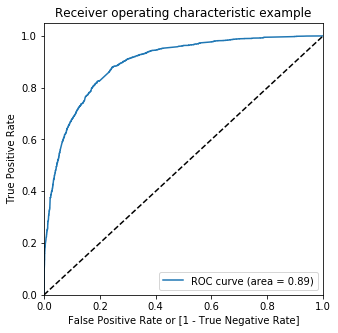

In [73]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cut-off Point

In [74]:
# Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.135353,8425,0,1,1,0,0,0,0,0,0,0,0
1,0,0.135353,8341,0,1,1,0,0,0,0,0,0,0,0
2,0,0.200811,7376,0,1,1,1,0,0,0,0,0,0,0
3,0,0.328569,7414,0,1,1,1,1,0,0,0,0,0,0
4,1,0.984747,3521,1,1,1,1,1,1,1,1,1,1,1


In [75]:
# Calculating Accuracy, Sensitivity, and Specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378020  1.000000  0.000000
0.1   0.1  0.644402  0.969925  0.446560
0.2   0.2  0.767251  0.919382  0.674791
0.3   0.3  0.801516  0.879699  0.753998
0.4   0.4  0.816675  0.773601  0.842854
0.5   0.5  0.816043  0.698413  0.887535
0.6   0.6  0.811780  0.634921  0.919269
0.7   0.7  0.788884  0.527151  0.947956
0.8   0.8  0.767409  0.439432  0.966743
0.9   0.9  0.717196  0.273601  0.986799


#### Plotting Accuracy, Sensitivity, and Specificity for the various probability cutoffs.

<Figure size 800x640 with 0 Axes>

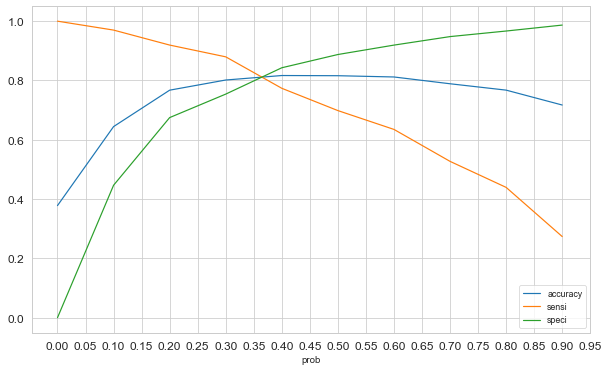

In [76]:
plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid")
sns.set_context("paper") 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

From the above curve, <b> 0.36 </b> seems like the <b> Optimal Cut-Off probability </b>.

In [77]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.135353,8425,0,1,1,0,0,0,0,0,0,0,0
1,0,0.135353,8341,0,1,1,0,0,0,0,0,0,0,0
2,0,0.200811,7376,0,1,1,1,0,0,0,0,0,0,0
3,0,0.328569,7414,0,1,1,1,1,0,0,0,0,0,0
4,1,0.984747,3521,1,1,1,1,1,1,1,1,1,1,1


In [78]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_Prob','Lead Number','Predicted','Lead_Score']].head()

,Converted,Converted_Prob,Lead Number,Predicted,Lead_Score
0,0,0.135353,8425,0,14
1,0,0.135353,8341,0,14
2,0,0.200811,7376,0,20
3,0,0.328569,7414,0,33
4,1,0.984747,3521,1,98


In [79]:
# Checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.815885046581399

In [80]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion1

array([[3223,  716],
       [ 450, 1944]], dtype=int64)

In [81]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [82]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8120300751879699

In [83]:
# Specificity of our model
TN / float(TN+FP)

0.8182279766438182

In [84]:
# False Postive Rate of the Model
print(FP/ float(TN+FP))

0.18177202335618178


In [85]:
# Positive Predictive Value of the Model
print (TP / float(TP+FP))

0.7308270676691729


In [86]:
# Negative Predictive Value of the Model
print (TN / float(TN+ FN))

0.8774843452218895


# Model Evaluation on Test Data

In [87]:
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [88]:

X_test = X_test[X_train_sm.columns[1:]]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,...,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Specialization_Unknown,What is your current occupation_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4462,0,0.00,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5243,0,0.08,0.071460,0.133333,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4597,0,0.08,0.190857,0.133333,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4680,0,0.00,0.000000,0.000000,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
5355,0,0.00,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [89]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the Test Data Set

In [90]:
y_test_pred = res.predict(X_test_sm)

In [91]:
y_test_pred[:10]

4462    0.740049
5243    0.138216
4597    0.198249
4680    0.996245
5355    0.135353
7071    0.096541
6314    0.975124
2688    0.996245
6228    0.099678
3014    0.071668
dtype: float64

In [92]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
4462,0.740049
5243,0.138216
4597,0.198249
4680,0.996245
5355,0.135353


In [93]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [94]:
# Putting Lead Number as index

y_test_df['Lead Number'] = y_test_df.index

In [95]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [96]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [97]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [98]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [99]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,4462,1,0.740049
1,5243,0,0.138216
2,4597,1,0.198249
3,4680,1,0.996245
4,5355,0,0.135353


In [100]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [101]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,4462,1,0.740049,1
1,5243,0,0.138216,0
2,4597,1,0.198249,0
3,4680,1,0.996245,1
4,5355,0,0.135353,0


In [102]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1391,  290],
       [ 215,  819]], dtype=int64)

In [103]:
# Accuracy of our model

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8139963167587477

In [104]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [105]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.7920696324951644

In [106]:
# Specificity of our model
TN / float(TN+FP)

0.8274836406900654

In [107]:
# False Postive Rate of the Model
print(FP/ float(TN+FP))

0.17251635930993456


In [108]:
# Positive Predictive Value of the Model
print (TP / float(TP+FP))

0.7385031559963932


In [109]:
# Negative Predictive Value of the Model
print (TN / float(TN+ FN))

0.8661270236612703


Assigning the Lead Score to the Test Set:

In [110]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))

y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted,Lead_Score
0,4462,1,0.740049,1,74
1,5243,0,0.138216,0,14
2,4597,1,0.198249,0,20
3,4680,1,0.996245,1,100
4,5355,0,0.135353,0,14


# Final Observation:

Comparing the values obtained for Train & Test:

### <u> Train Data</u>
- Accuracy : 81.58%
- Sensitivity : 81.20%
- Specificity : 81.82%

### <u> Test Data </u>
- Accuracy : 81.39%
- Sensitivity : 79.21%
- Specificity : 82.75%

<b>The Model seems to predict the Conversion Rate significantly well!